In [1]:
import sys
sys.path.insert(0, '..')
from visualization import test_classification_separation, plot_k_series_with_shaps

In [2]:
import copy
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
df = pd.read_csv('../data/sin_synth/SIN_NORMAL_500_v2.csv')

In [4]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,sin_x0,sin_x1,sin_y,error,label
0,2.660293,3.056744,-54.787036,147.531109,-127.049232,92.973527,-106.050250,86.720460,-28.215510,105.774728,...,-78.753511,10.121191,-79.401384,137.907317,33.417117,NaN,NaN,NaN,0.618168,0.0
1,43.003942,-137.208256,80.354776,-13.665030,95.036263,68.104365,135.226084,-17.488579,-83.678686,208.638704,...,-168.042861,-36.327714,-39.011280,-31.864061,103.265420,NaN,NaN,NaN,0.518792,0.0
2,9.471141,63.497215,-31.482380,-103.339378,202.875207,-8.517136,-61.251503,113.188059,110.701716,48.484166,...,72.351982,-6.083924,47.765295,-120.517771,133.320785,NaN,NaN,NaN,0.377066,0.0


In [5]:
df.error.describe()

count    500.000000
mean       0.695814
std        0.213933
min        0.162652
25%        0.489618
50%        0.760636
75%        0.894511
max        0.999123
Name: error, dtype: float64

In [6]:
df.label.value_counts()

1.0    250
0.0    250
Name: label, dtype: int64

In [7]:
len(df)

500

In [8]:
df = df.drop(columns='error')
X = df.drop(columns=['sin_x0', 'sin_x1', 'sin_y', 'label'])
y = df['label']

In [9]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.8, random_state=0)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y))

X_train, y_train = X.iloc[train_index], y.iloc[train_index]
X_test, y_test = X.iloc[test_index], y.iloc[test_index]

In [10]:
from gendis.genetic import GeneticExtractor
from gendis.fitness import logloss_fitness

/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [11]:
args = {
    "dist_function": "original",
    "fitness": logloss_fitness,
    "apply_differencing": False,
    "population_size": 100,
    "max_shaps": 5,
    "iterations": 50,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3, 
    "wait": 20, 
    "n_jobs": multiprocessing.cpu_count()-3,
    "verbose": True,
} 

gendis = GeneticExtractor(**args)

In [12]:
gendis.__dict__

{'dist_function': <cyfunction _pdist at 0x77411828f048>,
 'dist_func_returns': False,
 'fitness': <function gendis.fitness.logloss_fitness(D, y, verbose=False, return_info=False, shaps=None)>,
 'apply_differencing': False,
 'population_size': 100,
 'iterations': 50,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 20,
 'n_jobs': 13,
 'normed': False,
 'min_len': 0,
 'max_len': None,
 'max_shaps': 5,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len_series, max_len, min_len=4)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len_series, max_len, n_draw=None, min_len=4)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis.operators.remove_shapelet(shapelets, to

In [13]:
%%time
gendis.fit(X_train, y_train)

it		avg		max		time
1		-0.1817		-0.000881	1.3326
2		-0.0964		-0.000881	2.2394
3		-0.0613		-0.000266	2.639
4		-0.0292		-6.9e-05	2.7494
5		-0.0195		-6.5e-05	2.9357
6		-0.0104		-5.7e-05	3.3861
7		-0.0026		-3.1e-05	3.6223
8		-0.001		-3.1e-05	3.7787
9		-0.0003		-3.1e-05	3.4826
10		-0.0002		-2.8e-05	4.0141
11		-0.0001		-2.8e-05	3.3782
12		-0.0001		-2.8e-05	4.1102
13		-0.0001		-2.8e-05	4.224
14		-0.0		-2.3e-05	4.0334
15		-0.0001		-2.2e-05	4.9962
16		-0.0		-2.2e-05	5.0071
17		-0.0		-2.2e-05	6.3462
18		-0.0		-2.1e-05	6.245
19		-0.0		-2.1e-05	5.9328
20		-0.0		-2e-05	5.7843
21		-0.0		-1.9e-05	6.3557
22		-0.0		-1.8e-05	6.3049
23		-0.0		-1.8e-05	5.5301
24		-0.0		-1.7e-05	5.2303
25		-0.0		-1.7e-05	5.3561
26		-0.0		-1.6e-05	4.667
27		-0.0		-1.5e-05	4.6597
28		-0.0		-1.3e-05	4.9568
29		-0.0		-1.2e-05	5.0289
30		-0.0		-1.2e-05	5.2794
31		-0.0		-1.2e-05	7.7063
32		-0.0		-1.2e-05	8.0264
33		-0.0		-1.2e-05	8.5214
34		-0.0		-1.1e-05	9.4978
35		-0.0		-1e-05	8.6417
36		-0.0		-1e-05	7.6884
37		-0.0		-1e-05	8.6

In [14]:
%%time
distances = gendis.transform(X)
distances_train = gendis.transform(X_train)
distances_test = gendis.transform(X_test)

CPU times: user 15.1 s, sys: 44.1 ms, total: 15.2 s
Wall time: 15.2 s


In [15]:
distances[['sin_x0', 'sin_x1', 'sin_y', 'label']] = df[['sin_x0', 'sin_x1', 'sin_y', 'label']]

Testing separation for shapelet 0
Accuracy = 0.96
[[193   7]
 [  9 191]]


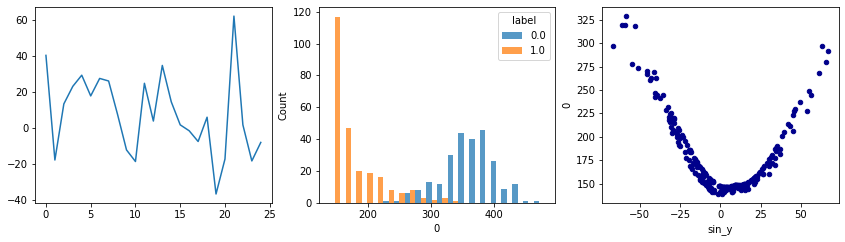

Testing separation for shapelet 1
Accuracy = 0.5375
[[111  89]
 [ 96 104]]


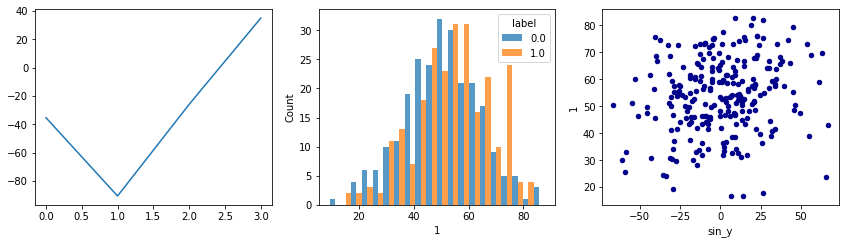

Testing separation for shapelet 2
Accuracy = 0.9075
[[176  24]
 [ 13 187]]


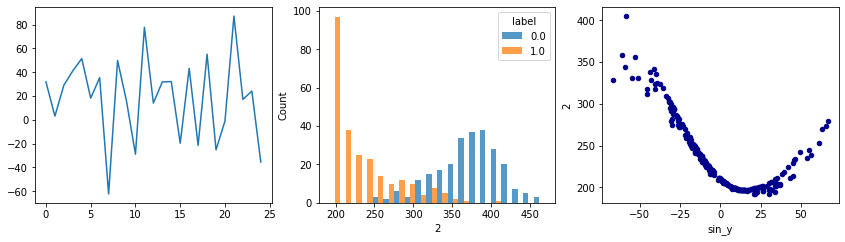

Testing separation for shapelet 3
Accuracy = 0.6075
[[127  73]
 [ 84 116]]


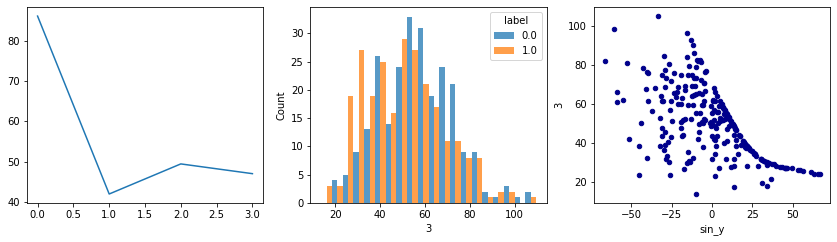

Testing separation for shapelet 4
Accuracy = 0.9325
[[187  13]
 [ 14 186]]


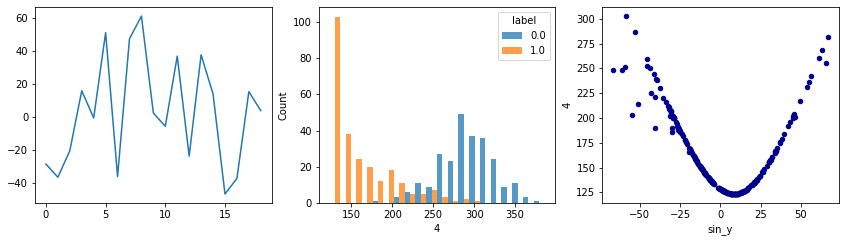

Testing separation for shapelet 5
Accuracy = 0.895
[[180  20]
 [ 22 178]]


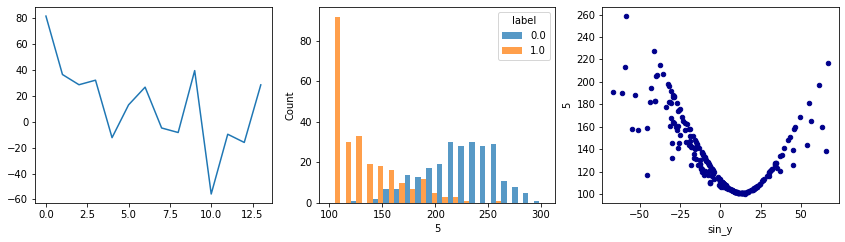

Testing separation for shapelet 6
Accuracy = 0.9275
[[186  14]
 [ 15 185]]


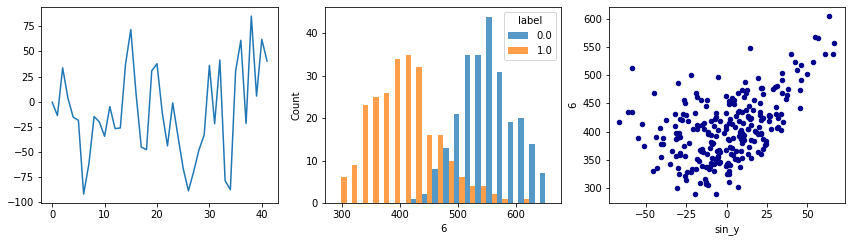

Testing separation for shapelet 7
Accuracy = 0.9375
[[190  10]
 [ 15 185]]


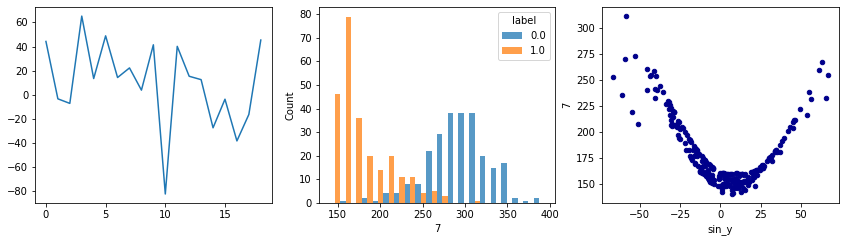

Testing separation for shapelet 8
Accuracy = 0.875
[[177  23]
 [ 27 173]]


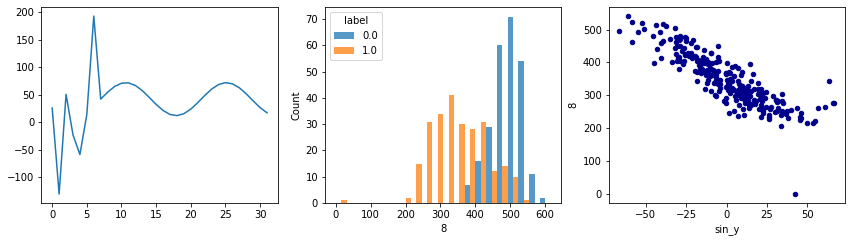

Testing separation for shapelet 9
Accuracy = 0.92
[[186  14]
 [ 18 182]]


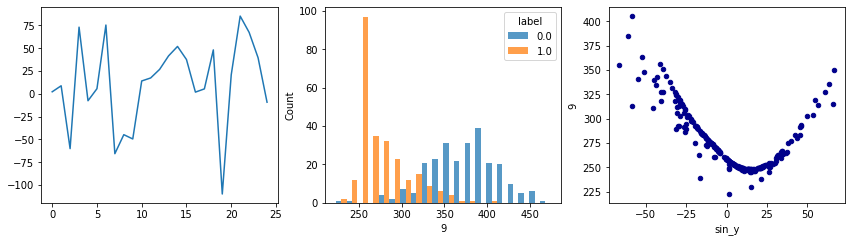

Testing separation for shapelet 10
Accuracy = 0.9525
[[193   7]
 [ 12 188]]


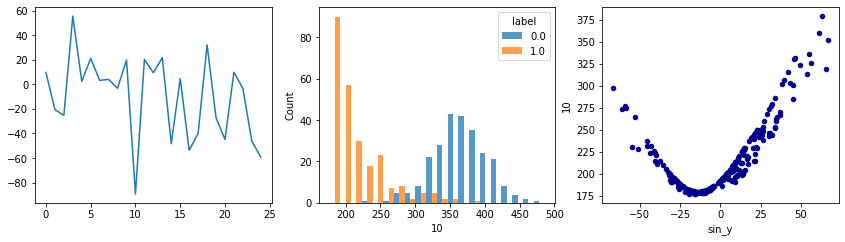

Testing separation for shapelet 11
Accuracy = 0.7775
[[161  39]
 [ 50 150]]


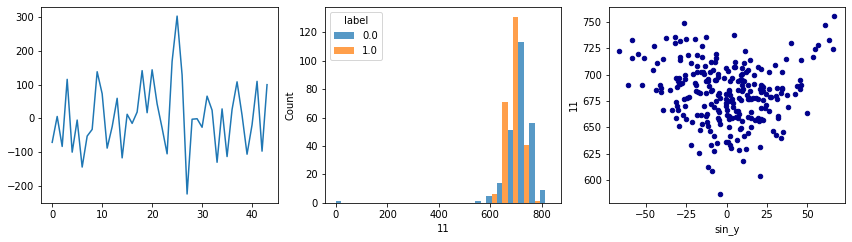

Testing separation for shapelet 12
Accuracy = 0.9175
[[187  13]
 [ 20 180]]


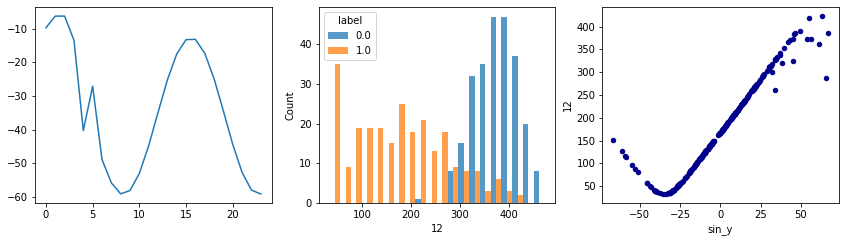

Testing separation for shapelet 13
Accuracy = 0.815
[[165  35]
 [ 39 161]]


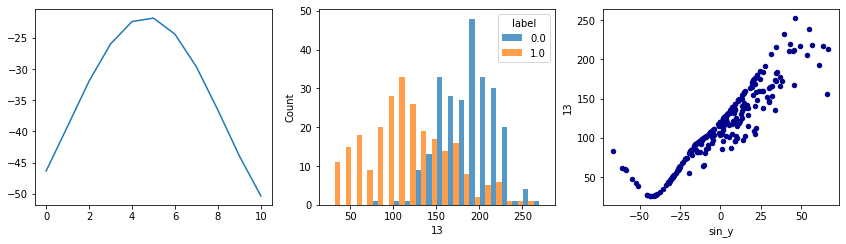

Testing separation for shapelet 14
Accuracy = 0.9225
[[182  18]
 [ 13 187]]


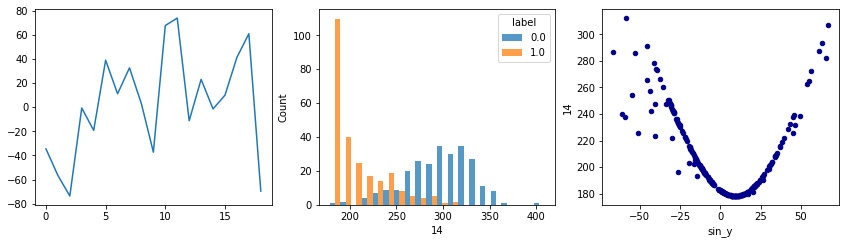

Testing separation for shapelet 15
Accuracy = 0.85
[[166  34]
 [ 26 174]]


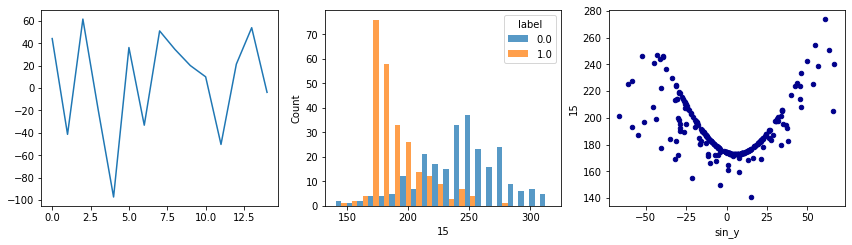

Testing separation for shapelet 16
Accuracy = 0.935
[[183  17]
 [  9 191]]


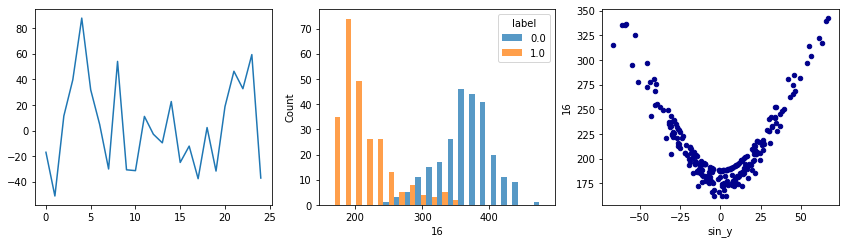

Testing separation for shapelet 17
Accuracy = 0.9
[[182  18]
 [ 22 178]]


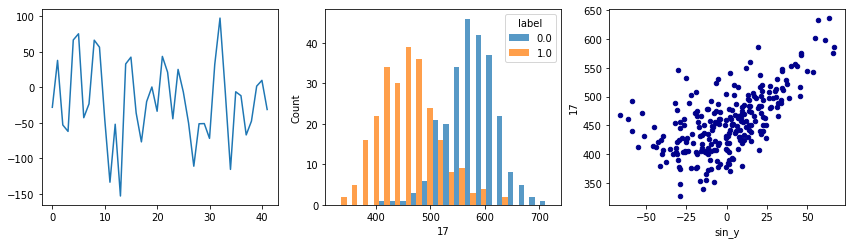

Testing separation for shapelet 18
Accuracy = 0.7375
[[151  49]
 [ 56 144]]


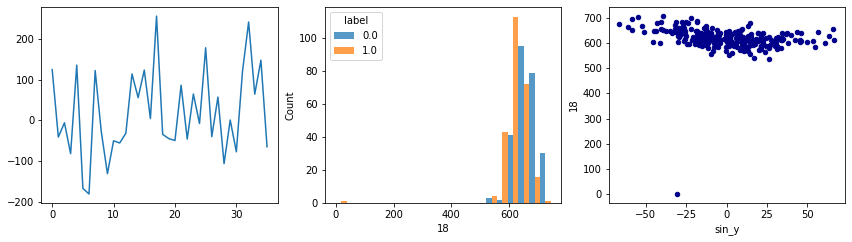

Testing separation for shapelet 19
Accuracy = 0.685
[[140  60]
 [ 66 134]]


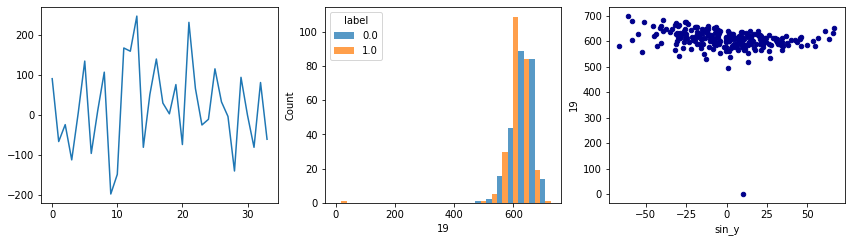

Testing separation for shapelet 20
Accuracy = 0.915
[[183  17]
 [ 17 183]]


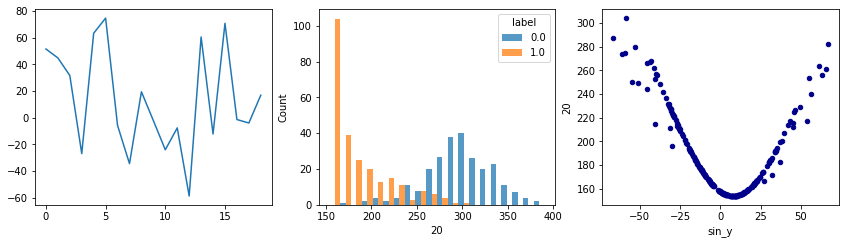

Testing separation for shapelet 21
Accuracy = 0.965
[[193   7]
 [  7 193]]


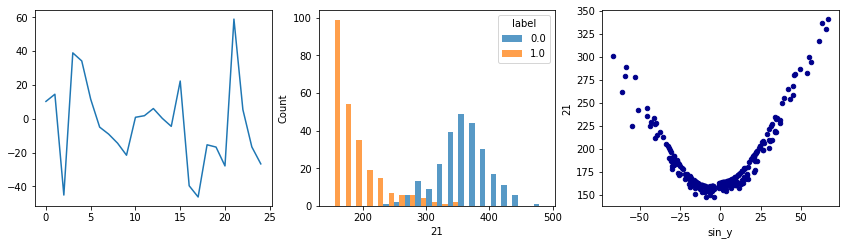

Testing separation for shapelet 22
Accuracy = 0.9
[[176  24]
 [ 16 184]]


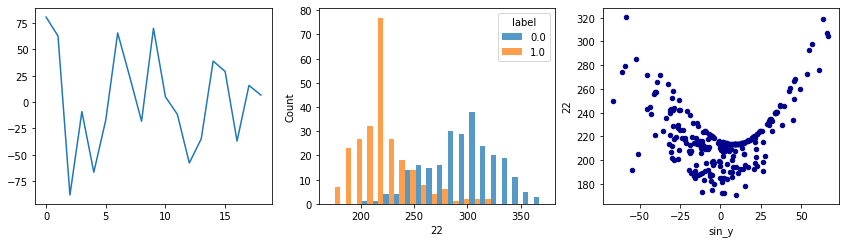

Testing separation for shapelet 23
Accuracy = 0.945
[[187  13]
 [  9 191]]


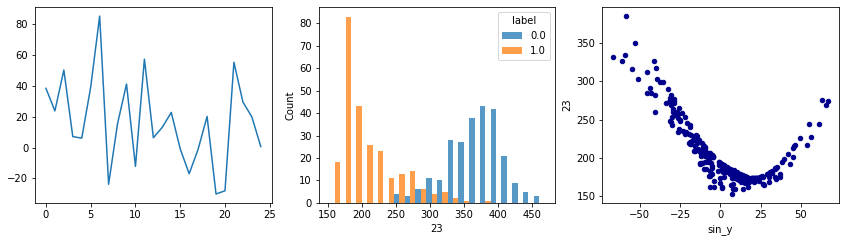

Testing separation for shapelet 24
Accuracy = 0.76
[[157  43]
 [ 53 147]]


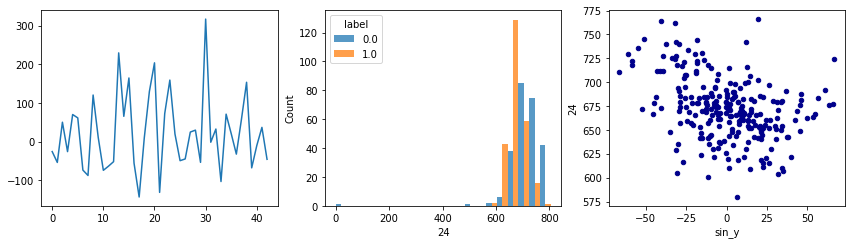

Testing separation for shapelet 25
Accuracy = 0.5
[[  0 200]
 [  0 200]]


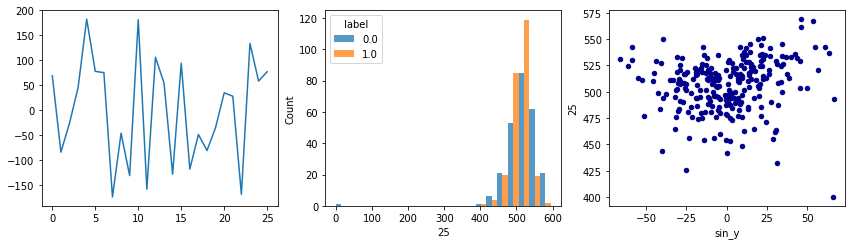

In [16]:
for i, shap in enumerate(gendis.best["shapelets"], start=0):
    test_classification_separation(
        D=distances, 
        y=y, 
        d_train=distances_train, 
        d_test=distances_test, 
        shap=shap, 
        shap_id=i,
        plot_sin_y=True
    )

## Manually input sin shapelet

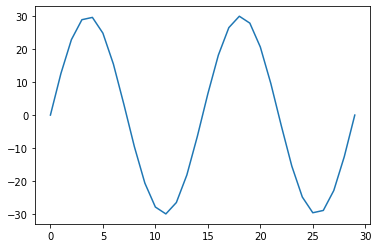

In [17]:
sin_length = 30
t = np.linspace(0, 4*np.pi, sin_length)
sine_wave = 30 * np.sin(t)
plt.plot(sine_wave)

In [22]:
df

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,sin_x0,sin_x1,sin_y,label
0,2.660293,3.056744,-54.787036,147.531109,-127.049232,92.973527,-106.050250,86.720460,-28.215510,105.774728,...,72.155385,-78.753511,10.121191,-79.401384,137.907317,33.417117,NaN,NaN,NaN,0.0
1,43.003942,-137.208256,80.354776,-13.665030,95.036263,68.104365,135.226084,-17.488579,-83.678686,208.638704,...,78.725804,-168.042861,-36.327714,-39.011280,-31.864061,103.265420,NaN,NaN,NaN,0.0
2,9.471141,63.497215,-31.482380,-103.339378,202.875207,-8.517136,-61.251503,113.188059,110.701716,48.484166,...,-106.994293,72.351982,-6.083924,47.765295,-120.517771,133.320785,NaN,NaN,NaN,0.0
3,24.297066,6.816447,-47.316950,-77.833351,-134.118001,95.672427,26.535631,78.241377,133.201928,70.782438,...,17.139843,194.972926,270.100381,-56.564370,-236.437084,171.927761,NaN,NaN,NaN,0.0
4,21.867978,111.385423,-54.866042,45.929554,-78.659692,-26.250114,67.182462,-74.377724,153.279754,36.115342,...,118.991007,47.792704,-28.651142,-84.003702,-11.064995,101.360701,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-58.606515,61.306087,56.708967,-113.140484,-106.025721,69.887268,87.892138,17.204023,-67.314452,32.732238,...,-80.965146,96.869715,13.086832,-79.649896,117.821852,-77.240925,88.0,118.0,-43.663417,1.0
496,33.113828,-21.193285,16.743192,26.085703,-92.826344,241.180475,-167.493249,213.248678,-132.050101,-50.597865,...,47.486343,-53.034856,-80.551944,41.796695,0.185183,-133.494745,15.0,45.0,3.053621,1.0
497,28.381763,14.108413,-54.182824,-6.077039,-46.521846,79.845795,-9.725071,-82.408668,43.331451,-20.231024,...,-198.897771,-82.824747,-40.718875,-46.642662,-126.848999,51.453888,113.0,143.0,-21.945778,1.0
498,119.080803,-38.154540,-103.663187,130.206041,63.587572,97.250539,-127.700138,-254.143108,94.891791,104.059817,...,141.735833,-29.162768,-36.090275,87.669358,-155.379371,133.521110,76.0,106.0,-14.160778,1.0


In [23]:
%%time
distances_sin = gendis.transform(X, shapelets=[sine_wave])
dist_sin_train = gendis.transform(X_train, shapelets=[sine_wave])
dist_sin_test = gendis.transform(X_test, shapelets=[sine_wave])

distances_sin[['label', 'sin_y']] = df[['label', 'sin_y']]

CPU times: user 597 ms, sys: 0 ns, total: 597 ms
Wall time: 596 ms


Testing separation for shapelet 0
Accuracy = 0.9725
[[196   4]
 [  7 193]]


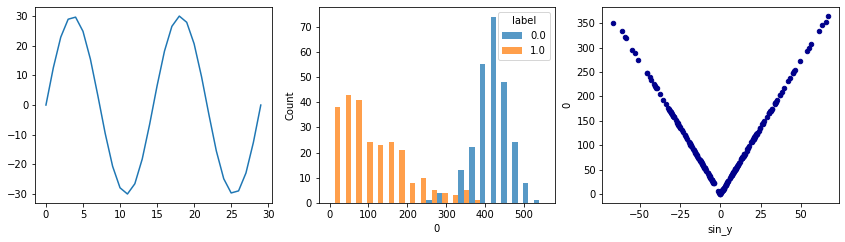

In [24]:
test_classification_separation(
        D=distances_sin, 
        y=y, 
        d_train=dist_sin_train, 
        d_test=dist_sin_test, 
        shap=sine_wave, 
        shap_id=0,
        plot_sin_y=True
    )